In [1]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

In [2]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


# 各パス指定

In [3]:
dataset = 'model/keypoint_classifier/keypoint.csv'
#model_save_path = 'model/keypoint_classifier/keypoint_classifier.hdf5'
model_save_path = "model/keypoint_classifier/keypoint_classifier.keras" 

# 分類数設定

In [4]:
NUM_CLASSES = 8

# 学習データ読み込み

In [5]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [6]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# モデル構築

In [8]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [9]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dropout (Dropout)                    │ (None, 42)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 20)                  │             860 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 20)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             210 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 8)                   │              88 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,158 (4.52 KB)

 Trainable params: 1,158 (4.52 KB)

 Non-trainable params: 0 (0.00 B)

In [10]:
# モデルチェックポイントのコールバック
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# 早期打ち切り用コールバック
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [11]:
# モデルコンパイル
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# モデル訓練

In [12]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
 1/13 ━━━━━━━━━━━━━━━━━━━━ 9s 797ms/step - accuracy: 0.0781 - loss: 2.1529
Epoch 1: saving model to model/keypoint_classifier/keypoint_classifier.keras
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.1100 - loss: 2.1606 - val_accuracy: 0.1568 - val_loss: 2.0664
Epoch 2/1000
 1/13 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.1641 - loss: 2.0933
Epoch 2: saving model to model/keypoint_classifier/keypoint_classifier.keras
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1584 - loss: 2.0830 - val_accuracy: 0.2252 - val_loss: 2.0157
Epoch 3/1000
 1/13 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.1406 - loss: 2.0487
Epoch 3: saving model to model/keypoint_classifier/keypoint_classifier.keras
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1643 - loss: 2.0393 - val_accuracy: 0.2216 - val_loss: 1.9685
Epoch 4/1000
 1/13 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.2109 - loss: 1.9783
Epoch 4: saving model to model/keypoint_classifier/keypoint_classifier.ker

In [13]:
# モデル評価
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9347 - loss: 0.2775 


In [14]:
# 保存したモデルのロード
model = tf.keras.models.load_model(model_save_path)

In [15]:
# 推論テスト
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
[3.8059949e-04 5.3682220e-07 2.4671692e-06 5.0677201e-05 4.4244903e-06
 8.4223396e-01 5.7429688e-06 1.5732160e-01]
5


# 混同行列

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 646us/step


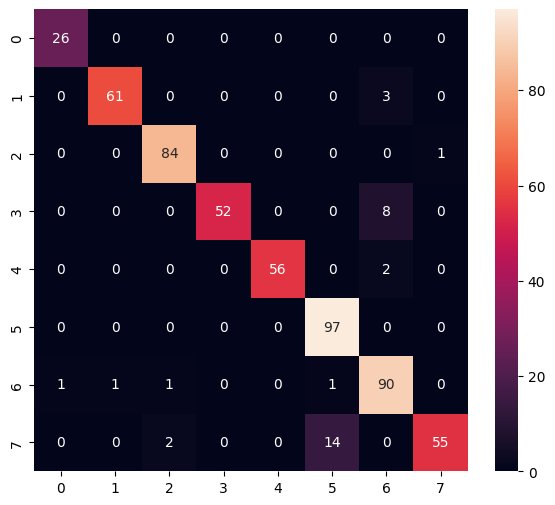

Classification Report
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        26
           1       0.98      0.95      0.97        64
           2       0.97      0.99      0.98        85
           3       1.00      0.87      0.93        60
           4       1.00      0.97      0.98        58
           5       0.87      1.00      0.93        97
           6       0.87      0.96      0.91        94
           7       0.98      0.77      0.87        71

    accuracy                           0.94       555
   macro avg       0.95      0.94      0.94       555
weighted avg       0.94      0.94      0.94       555



In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

In [17]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


# Tensorflow-Lite

In [18]:
# 推論専用のモデルとして保存
model.save(model_save_path, include_optimizer=False)

In [ ]:
# モデルを変換(量子化)
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\hemas\AppData\Local\Temp\tmpqj3lrj1c\assets


INFO:tensorflow:Assets written to: C:\Users\hemas\AppData\Local\Temp\tmpqj3lrj1c\assets


In [ ]:
pip install --upgrade tensorflow tensorflow-hub tensorflow-text

# 推論テスト

In [ ]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [ ]:
# 入出力テンソルを取得
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [ ]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [ ]:
%%time
# 推論実施
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

In [ ]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))